# Практическая работа № 5

### Импорт библиотек

In [1]:
import numpy as np

from sklearn.datasets import fetch_openml 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

### Задание 1

In [2]:
mnist = fetch_openml('mnist_784', version=1, parser='auto')
X = mnist.data
y = mnist.target

#### Функция отрисовки матрицы ошибок

In [3]:
def matrix_create(y_test, y_pred, title=None):
    confusion_mat = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(10, 8))
    plt.imshow(confusion_mat)
    plt.colorbar()
    plt.xlabel('Предсказанные метки классов')
    plt.ylabel('Истинные метки классов')
    plt.title(f'Матрица ошибок для MNIST\n {title}')
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, tick_marks)
    plt.yticks(tick_marks, tick_marks)
    plt.show()

### Задание 2

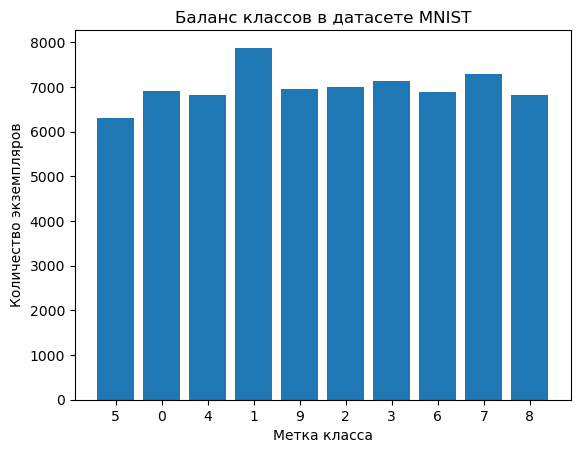

In [4]:
y = mnist.target

class_counts = dict()
for class_label in y:
    if class_label in class_counts:
        class_counts[class_label] += 1
    else:
        class_counts[class_label] = 1

labels = list(class_counts.keys())
counts = list(class_counts.values())

plt.bar(labels, counts)
plt.xlabel('Метка класса')
plt.ylabel('Количество экземпляров')
plt.title('Баланс классов в датасете MNIST')
plt.show()

### Задание 3

Предсказанные значения: 
 ['1' '5' '9' '3' '2' '8' '4' '4' '1' '2' '5' '0' '1' '4' '5' '8' '0' '5'
 '2' '5' '8' '4' '7' '5' '0' '6' '7' '3' '0' '2' '5' '9' '7' '8' '0' '8'
 '6' '2' '3' '1' '2' '3' '8' '3' '4' '0' '0' '2' '4' '9' '5' '4' '3' '9'
 '6' '4' '1' '9' '7' '3' '4' '8' '3' '9' '6' '3' '8' '1' '7' '6' '5' '7'
 '3' '7' '0' '0' '8' '1' '0' '3' '9' '1' '9' '0' '5' '0' '0' '5' '0' '5'
 '6' '0' '7' '1' '2' '9' '4' '7' '4' '8' '0' '7' '7' '7' '5' '6' '3' '4'
 '0' '7' '2' '9' '5' '5' '1' '6' '5' '1' '1' '1' '3' '7' '1' '0' '8' '6'
 '7' '2' '2' '9' '4' '9' '3' '6' '3' '6' '1' '1' '3' '9' '6' '1' '6' '5'
 '6' '7' '4' '0' '1' '4' '6' '3' '1' '9' '9' '1' '5' '2' '4' '2' '0' '1'
 '5' '7' '2' '0' '2' '2' '1' '4' '9' '4' '8' '8' '8' '1' '3' '6' '8' '3'
 '4' '4' '0' '8' '7' '9' '1' '6' '5' '8' '3' '6' '0' '2' '3' '1' '8' '6'
 '7' '3']
Исходные значения: 
 ['1' '5' '9' '3' '2' '8' '4' '4' '1' '2' '5' '0' '1' '4' '8' '8' '0' '8'
 '2' '5' '8' '4' '7' '5' '0' '6' '7' '3' '0' '2' '6' '9' '7' '8' '0

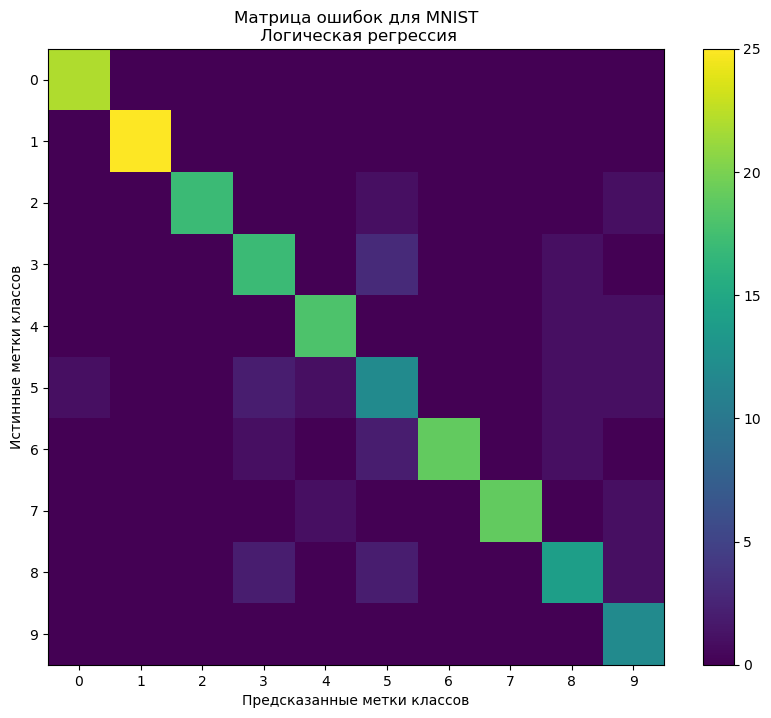

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      1.00      1.00        25
           2       1.00      0.89      0.94        19
           3       0.77      0.81      0.79        21
           4       0.90      0.90      0.90        20
           5       0.60      0.67      0.63        18
           6       1.00      0.83      0.90        23
           7       1.00      0.90      0.95        21
           8       0.78      0.74      0.76        19
           9       0.71      1.00      0.83        12

    accuracy                           0.88       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.89      0.88      0.88       200



In [5]:
sample_size = 1000  # Желаемый размер выборки
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=sample_size, random_state=42)


X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Предсказанные значения: \n', y_pred)
print('Исходные значения: \n', np.array(y_test))

matrix_create(y_test, y_pred, 'Логическая регрессия')
print(classification_report(y_test, y_pred))

In [6]:
print("Размер тренировочных данных:", X_train.shape)
print("Размер тестовых данных:", X_test.shape)
print("Размер тренировочных меток:", y_train.shape)
print("Размер тестовых меток:", y_test.shape)

Размер тренировочных данных: (800, 784)
Размер тестовых данных: (200, 784)
Размер тренировочных меток: (800,)
Размер тестовых меток: (200,)


### Задание 4 для SVM

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      1.00      1.00        25
           2       0.84      0.94      0.89        17
           3       0.76      0.84      0.80        19
           4       0.95      0.90      0.93        21
           5       0.94      0.74      0.83        23
           6       0.87      1.00      0.93        20
           7       0.90      0.95      0.93        20
           8       0.79      0.83      0.81        18
           9       1.00      0.75      0.86        16

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.89       200
weighted avg       0.91      0.90      0.90       200



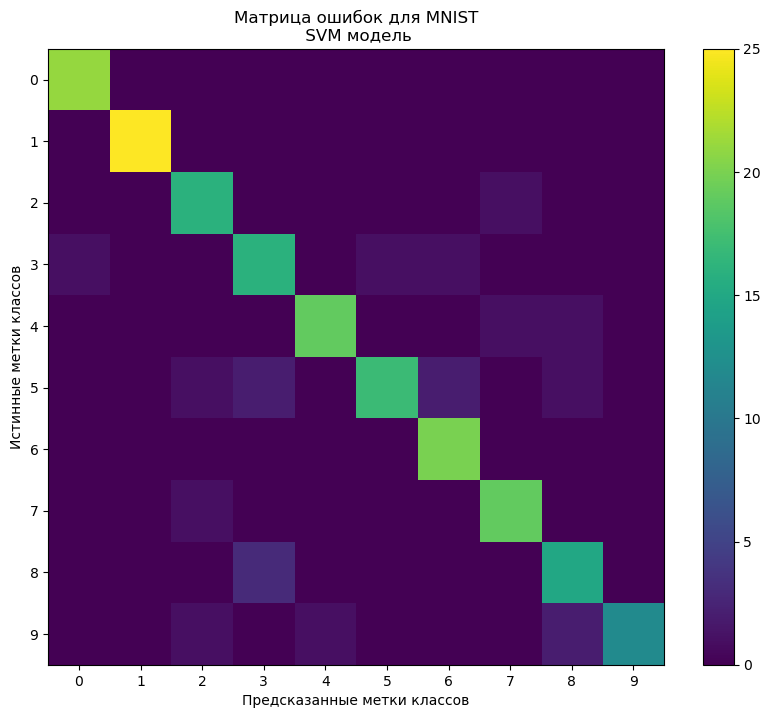

In [7]:
params_kernel = ('linear', 'rbf', 'poly', 'sigmoid')
parameters = {'kernel': params_kernel}
svm_model = SVC()
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=parameters, cv = 6)
grid_search_svm.fit(X_train, y_train)

best_model = grid_search_svm.best_estimator_
best_model.kernel

svm_pred = best_model.predict(X_test)

print(classification_report(svm_pred, y_test))
matrix_create(svm_pred, y_test, title="SVM модель")

### Задание 4 для KNN

d:\Programs\Study\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py:824: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "d:\Programs\Study\Anaconda\Lib\site-packages\sklearn\model_selection\_validation.py", line 813, in _score
    scores = scorer(estimator, X_test, y_test)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Programs\Study\Anaconda\Lib\site-packages\sklearn\metrics\_scorer.py", line 527, in __call__
    return estimator.score(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "d:\Programs\Study\Anaconda\Lib\site-packages\sklearn\base.py", line 705, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
                             ^^^^^^^^^^^^^^^
  File "d:\Programs\Study\Anaconda\Lib\site-packages\sklearn\neighbors\_classification.py", line 246, in predict
    if self._fit_method == "brute"

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        23
           1       1.00      0.81      0.89        31
           2       0.79      1.00      0.88        15
           3       0.81      0.81      0.81        21
           4       0.75      0.83      0.79        18
           5       0.78      0.88      0.82        16
           6       0.96      0.92      0.94        24
           7       0.81      0.85      0.83        20
           8       0.58      0.92      0.71        12
           9       0.83      0.50      0.62        20

    accuracy                           0.83       200
   macro avg       0.83      0.84      0.82       200
weighted avg       0.85      0.83      0.83       200



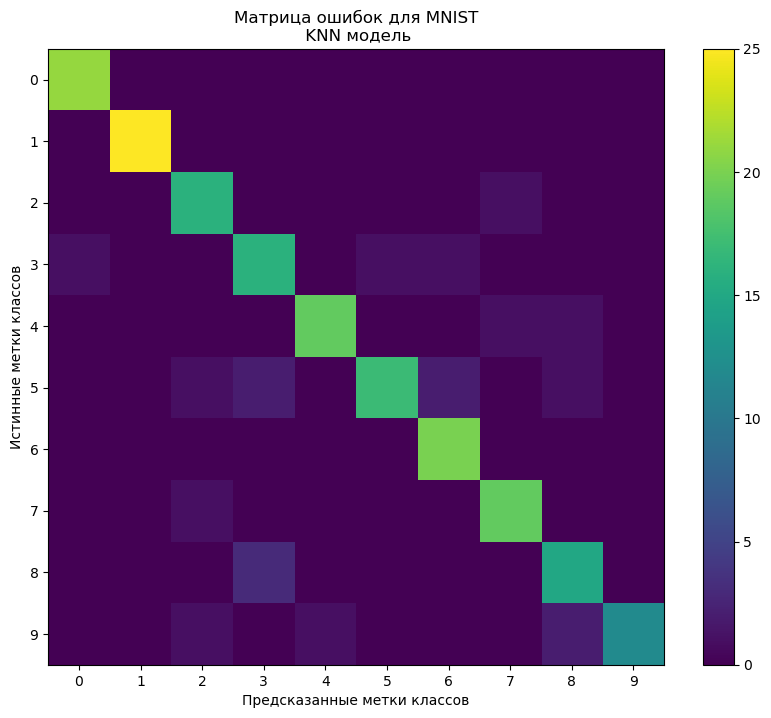

In [10]:
number_of_neighbors = np.arange(3, 10)
model_KNN = KNeighborsClassifier()
params = {'n_neighbors': number_of_neighbors}

grid_search = GridSearchCV(estimator = model_KNN,
                           param_grid= params, cv = 6)

X_test = np.ascontiguousarray(X_test)
grid_search.fit(X_train, y_train)

grid_search.best_score_
grid_search.best_estimator_

knn_pred = grid_search.predict(X_test)
print(classification_report(knn_pred, y_test))
matrix_create(svm_pred, y_test, title="KNN модель")


### Задание 5

In [11]:
print("Результаты классификации для Линейной регрессии:\n", classification_report(y_test, y_pred))

print("Результаты классификации для SVM:\n",classification_report(svm_pred, y_test))
print("Результаты классификации для KNN:\n", classification_report(knn_pred, y_test))

Результаты классификации для Линейной регрессии:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        22
           1       1.00      1.00      1.00        25
           2       1.00      0.89      0.94        19
           3       0.77      0.81      0.79        21
           4       0.90      0.90      0.90        20
           5       0.60      0.67      0.63        18
           6       1.00      0.83      0.90        23
           7       1.00      0.90      0.95        21
           8       0.78      0.74      0.76        19
           9       0.71      1.00      0.83        12

    accuracy                           0.88       200
   macro avg       0.87      0.87      0.87       200
weighted avg       0.89      0.88      0.88       200

Результаты классификации для SVM:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       1.00      1.00      1.00    